This notebook provides the steps for preprocessing the reviews dataset for data exploration. It applies various techniques to clean and format the data, and visualizes the data using plots and word clouds.

In [ ]:
# import google drive if necessary
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q contractions
!pip install emoji==2.6.0
!pip install NLTK==3.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351310 sha256=192172e74115446137105bf3c90fe4874134e4cc09ef38ce1c8cebfcf26f9bc6
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [ ]:
# import python sripts
import pre_process_reviews

# Imports
import seaborn as sns
import pandas as pd
import string
import math

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import contractions
from contractions import contractions_dict

import unicodedata
import emoji
import re

import nltk
nltk.download(['punkt','stopwords', 'wordnet', 'omw-1.4'])

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
print("Seaborn version:", sns.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)
print("emoji version:", emoji.__version__)


Seaborn version: 0.12.2
pandas version: 1.5.3
numpy version: 1.23.5
matplotlib version: 3.7.1
re version: 2.2.1
nltk version: 3.8.1
emoji version: 2.6.0


In [ ]:
# data path to datasets
data_path = '[insert path to csv file here]'


In [ ]:
# Load Dataframe
df = pd.read_csv(data_path, parse_dates=['date'], low_memory=False)

# Pre-Process Data

In [ ]:
# keep necessary/important columns
df = df[['listing_id',"id", 'date', 'comments']]

In [ ]:
# Drop rows with empty strings in the 'reviews' column
df = df.drop(df[df['comments'] == ''].index)

# Drop rows with NaN values in the 'reviews' column
df = df.dropna(subset=['comments'])

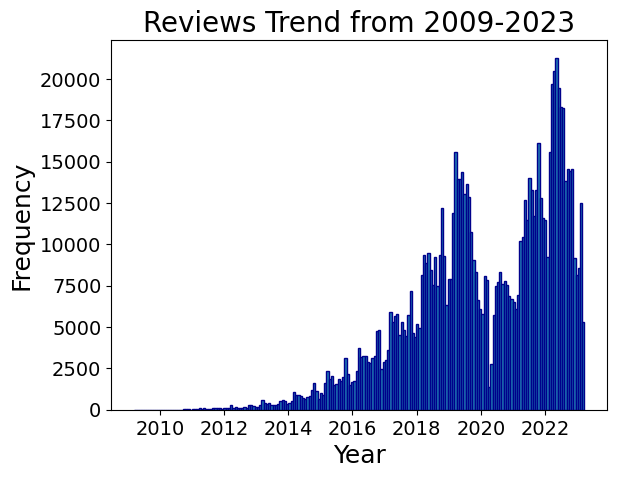

In [ ]:
# Create histogram of amount of reviews from 2009-2023
plt.hist(df['date'], bins='auto', edgecolor='darkblue')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Reviews Trend from 2009-2023', fontsize= 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# Apply the preprocess_text function to the 'comments' column
df['reviews'] = df['comments'].apply(pre_process_reviews.preprocess_model)

In [ ]:
# apply the is_english_function to the 'text' column of the dataframe
df['is_english'] = df['reviews'].apply(pre_process_reviews.is_english)

# keep only english prompts
df = df[df['is_english'] == True]

# drop unecessary columns
df = df.drop(['comments', 'is_english', 'id'], axis=1)

### Save datframe
The dataframe 'df' will be used to tune
the ROBERTa pre-trained model in the `roberta.ipynb` notebook

In [ ]:
# save dataframe to system
# df.to_csv(data_path + 'all_reviews/bert_reviews.csv', index=False)

A copy is necessary since further pre-processing is not necessaray for the pre-trained model ROBERTa.

The copy `reviews_df` will be further process to build a word cloud.

In [ ]:
df = pd.read_csv(data_path + 'all_reviews/bert_reviews.csv', parse_dates=['date'], low_memory=False)

In [ ]:
# make cody of reviews dataframe
reviews_df = df.copy()

In [ ]:
# Convert the 'reviews' column to strings
reviews_df['reviews'] = reviews_df['reviews'].astype(str)

In [ ]:
# Apply the expand_contractions function to the 'reviews' column
reviews_df['reviews'] = reviews_df['reviews'].apply(pre_process_reviews.expand_contractions)


In [ ]:
# Apply the preprocess_text function to the 'reviews' column
reviews_df['reviews'] = reviews_df['reviews'].apply(pre_process_reviews.preprocess_text2)

## Word Cloud

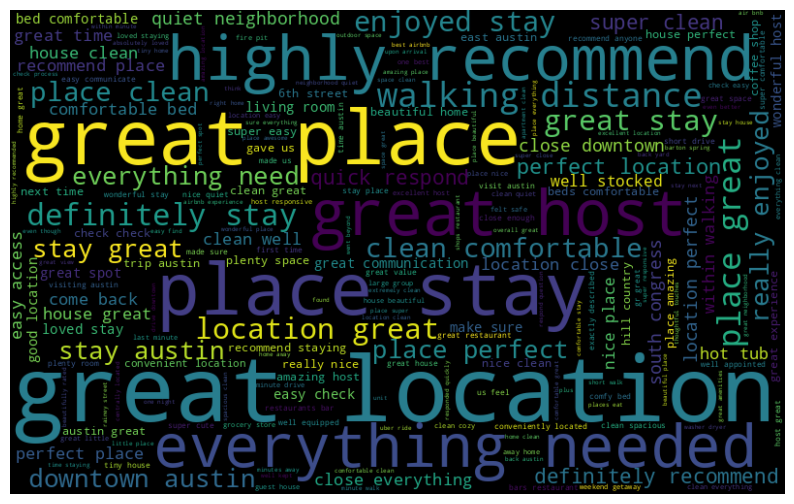

In [ ]:
# create wordcloud of most frequents words in reviews (black background)
all_words = ' '.join([text for text in reviews_df['reviews'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

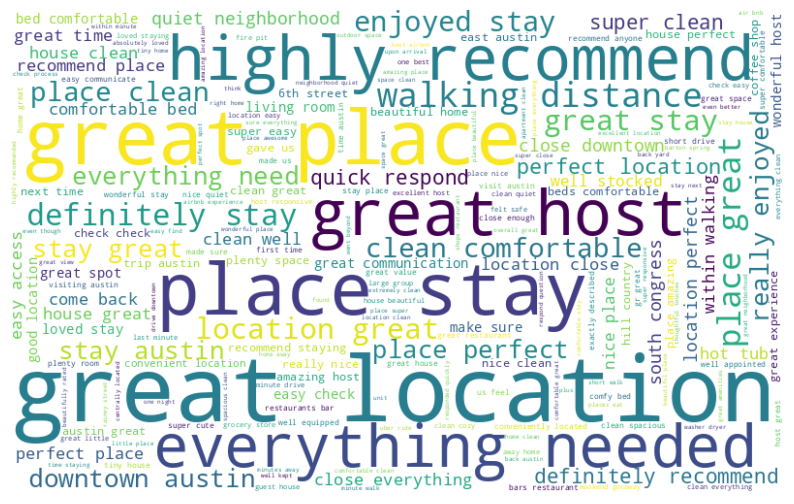

In [ ]:
# Create wordcloud of most frequent words in reviews (white background)
all_words = ' '.join([text for text in reviews_df['reviews']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The word cloud demonstrates the prominent terms used in Airbnb reviews. The larger the word appears, the more frequently it is mentioned in the reviews. The word cloud highlights significant terms such as "clean," "great location,", "walking distance,", and "everything needed." These terms shed light on the attributes and experiences that guests frequently emphasize and appreciate in their Airbnb stays.
